# Predicting House Prices
### K

In this project, we explore how house prices vary with features like number of bedrooms, house condition, living area, and location (postal codes). We use simple, clear graphs like bar plots, pie charts, and line plots to show real-world price trends.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,8)

## Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\.ipynb_checkpoints\House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


## Data Cleaning

In [3]:
# Drop rows with missing values
df = df.dropna()

# Select important columns
features = ['living area', 'number of bedrooms', 'number of bathrooms', 'lot area',
            'condition of the house', 'Postal Code', 'Price']
df = df[features]
df.head()

,living area,number of bedrooms,number of bathrooms,lot area,condition of the house,Postal Code,Price
0,2920,4,2.50,4000,5,122004,1400000
1,2910,5,2.75,9480,3,122004,1200000
2,3310,4,2.50,42998,3,122005,838000
3,2710,3,2.00,4500,4,122006,805000
4,2600,3,2.50,4750,4,122007,790000


## 1. Number of Houses by Bedrooms

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6516\3476802141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, palette='muted')


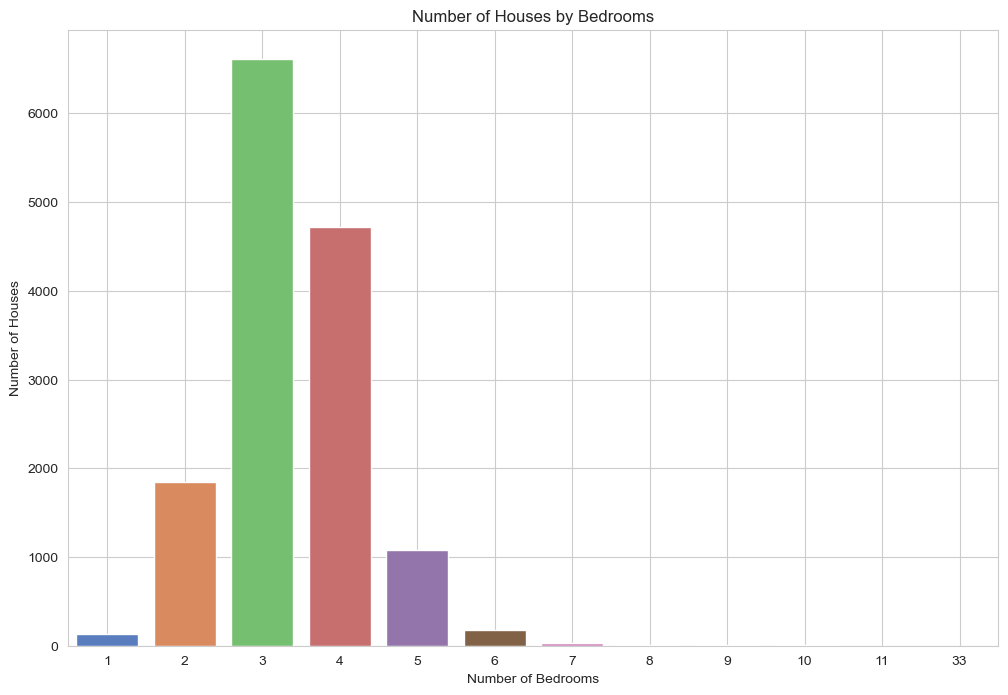

In [4]:
bedroom_counts = df['number of bedrooms'].value_counts().sort_index()
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, palette='muted')
plt.title('Number of Houses by Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

## 2. House Price Distribution

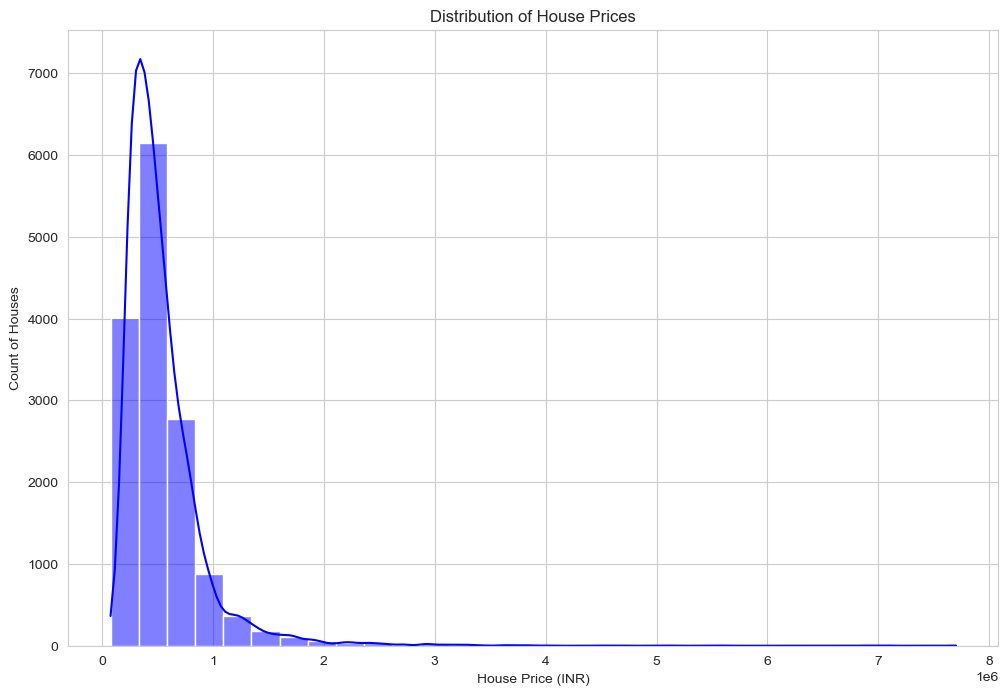

In [5]:
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('House Price (INR)')
plt.ylabel('Count of Houses')
plt.grid(True)
plt.show()

## 3. Top 10 Most Expensive Houses

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6516\1030315336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y=top10.index, data=top10, palette='viridis', orient='h')


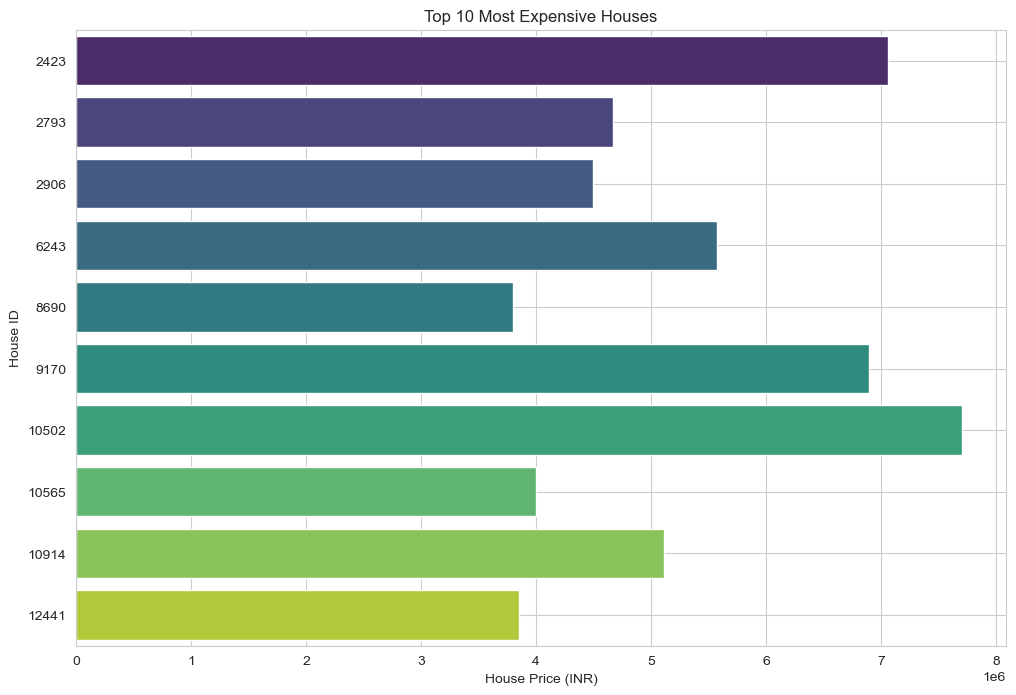

In [6]:
top10 = df.sort_values('Price', ascending=False).head(10)
sns.barplot(x='Price', y=top10.index, data=top10, palette='viridis', orient='h')
plt.title('Top 10 Most Expensive Houses')
plt.xlabel('House Price (INR)')
plt.ylabel('House ID')
plt.grid(True)
plt.show()

## 4. House Condition vs Average Price

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6516\2530737949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_condition.index, y=avg_price_condition.values, palette='pastel')


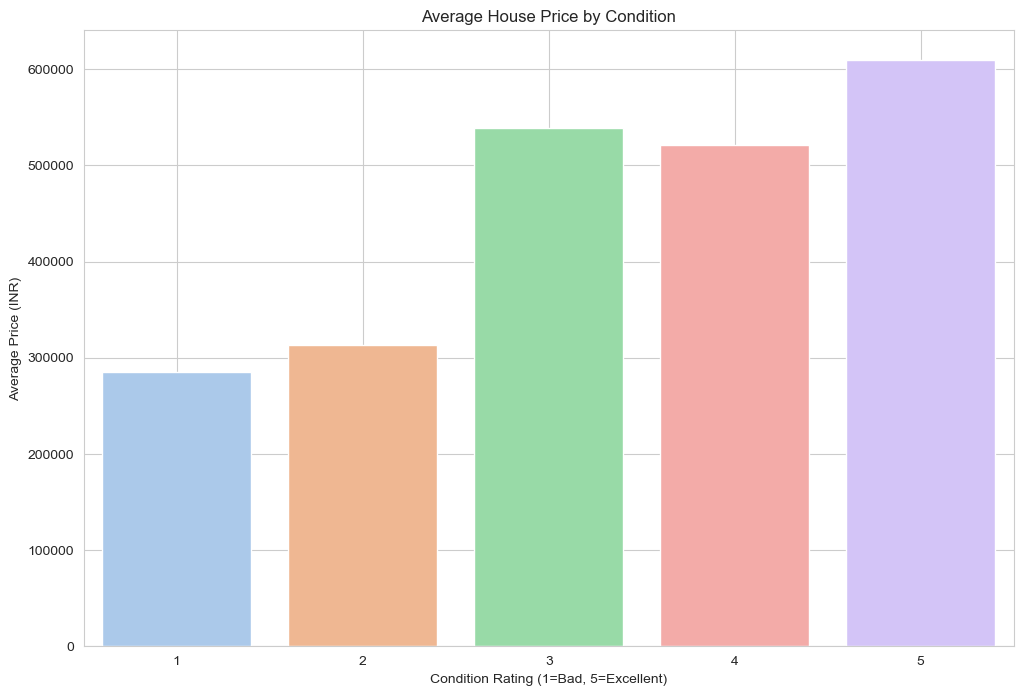

In [7]:
avg_price_condition = df.groupby('condition of the house')['Price'].mean().sort_index()
sns.barplot(x=avg_price_condition.index, y=avg_price_condition.values, palette='pastel')
plt.title('Average House Price by Condition')
plt.xlabel('Condition Rating (1=Bad, 5=Excellent)')
plt.ylabel('Average Price (INR)')
plt.grid(True)
plt.show()

## 5. House Price Categories (Pie Chart)

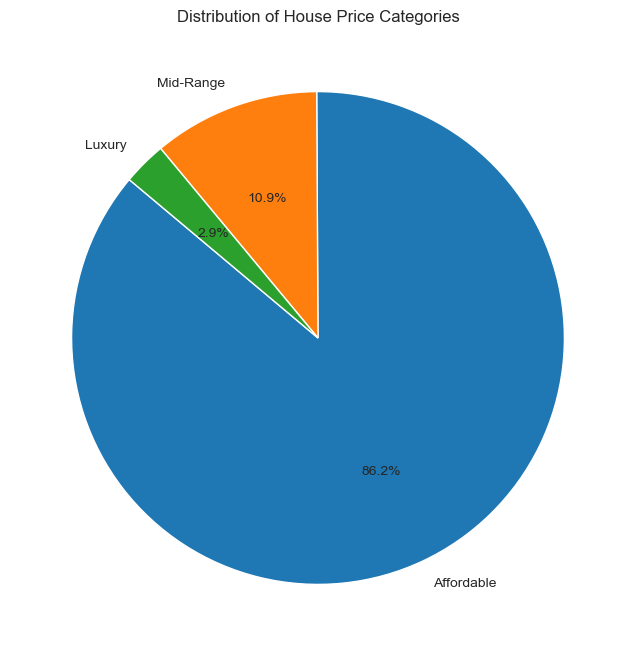

In [8]:
def price_category(price):
    if price < 800000:
        return 'Affordable'
    elif price < 1400000:
        return 'Mid-Range'
    else:
        return 'Luxury'

df['Price Category'] = df['Price'].apply(price_category)

category_counts = df['Price Category'].value_counts()
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of House Price Categories')
plt.show()

## 6. Living Area vs Price (Line Plot)

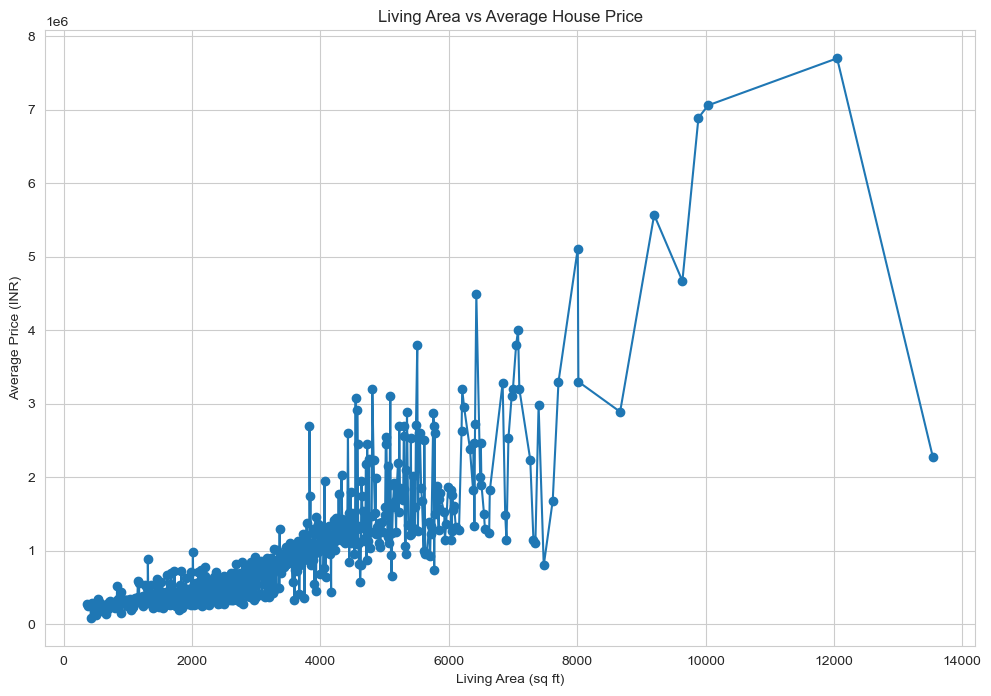

In [9]:
living_area_price = df.groupby('living area')['Price'].mean().sort_index()
plt.plot(living_area_price.index, living_area_price.values, marker='o')
plt.title('Living Area vs Average House Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Average Price (INR)')
plt.grid(True)
plt.show()

## 7. Average House Price by Location (Postal Code)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6516\79089913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_location.index, y=avg_price_location.values, palette='coolwarm')


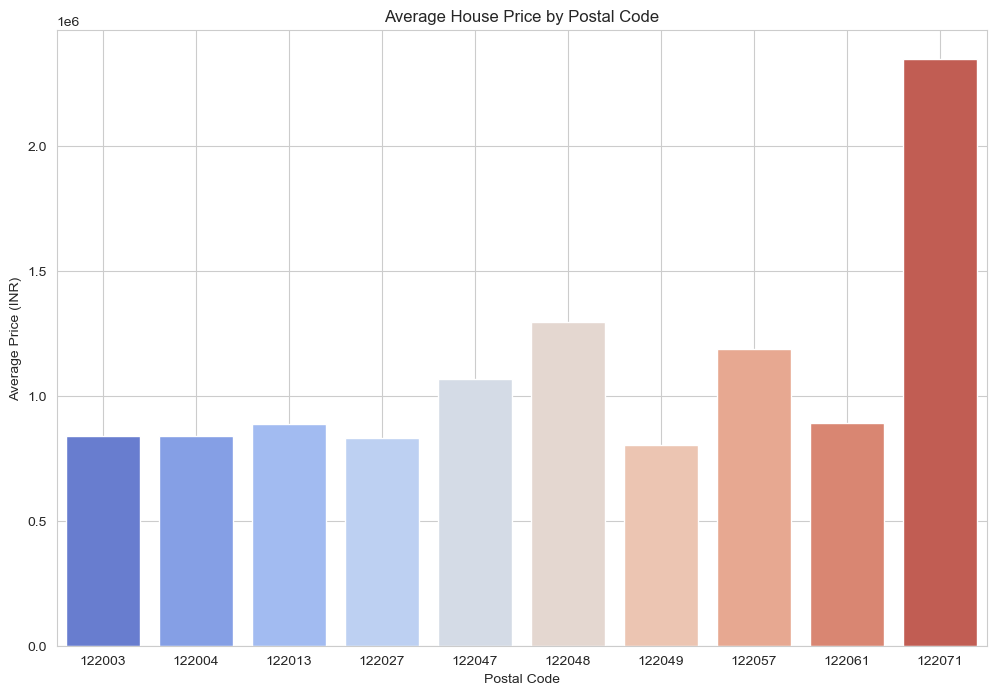

In [10]:
avg_price_location = df.groupby('Postal Code')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_location.index, y=avg_price_location.values, palette='coolwarm')
plt.title('Average House Price by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Average Price (INR)')
plt.grid(True)
plt.show()

## Conclusion

- Most houses are 3BHK or 4BHK.
- Majority of houses are priced in the mid-range category.
- Better house condition leads to higher prices.
- Larger living areas significantly increase prices.
- Some postal codes have higher prices due to prime locations.

**Summary: House size, condition, and location greatly influence house prices.**